# Scripts da aula prática sobre Árvore de decisão, Redes neurais e SVM

## Árvore de decisão

### Prevendo o aparecimento de diabetes com base em medidas de diagnóstico

#### Importando as bibliotecas necessárias
Primeiro vamos importar as bibliotecas que iremos utilizar

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #Divide arrays ou matrizes em conjuntos aleatórios de treino e de teste
from sklearn import metrics #Importa o módulo de métricas para poder calcular a acurácia

#### Carregando a base de dados
Vamos carregar o conjunto de dados necessário usando a função de leitura csv do pandas. 

Mais detalhes sobre a base de dados pode ser encontrado [aqui](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [2]:
#Carregando a base
pima = pd.read_csv("https://raw.githubusercontent.com/audreyemmely/ciencia-de-dados/main/monitoria/aula_pratica1/dados/pima-indians-diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Seleção de features
Aqui, você precisa dividir as colunas fornecidas em dois tipos de variáveis, dependentes (variáveis target) e independentes (variáveis features).

In [4]:
features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = pima[features_cols] #Variável feature
y = pima.Outcome #Variável target

#### Dividindo a base em treino e teste
Para entender o desempenho do modelo, dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste é uma boa estratégia.
Vamos dividir a base de dados usando a função ```train_test_split()```. É preciso passar 3 parâmetros: features, target e test_size.



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 
#70% dos dados são usados para o treinamento e 30% são usados para teste

#### Construindo o modelo de árvore de decisão
Vamos criar o modelo utilizando o scikit-learn

In [6]:
#Criando o objeto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# O parâmetro criterion nos permite escolher a medida de seleção de atributo. 
# Os critérios suportados são “gini” para o índice de Gini e “entropy” para o ganho de informação.

#Treinando
clf = clf.fit(X_train, y_train)

#Prevendo
y_pred = clf.predict(X_test)

#### Avaliando o modelo
Vamos estimar com que precisão o classificador ou modelo pode prever.

A precisão pode ser calculada comparando os valores reais do conjunto de teste e os valores previstos.

In [7]:
# Precisão do modelo, com que frequência o classificador está correto?
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.7705627705627706


Bem, uma taxa de classificação de 77,05% é considerada uma boa acurácia.

#### Visualizando a árvore de decisão


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


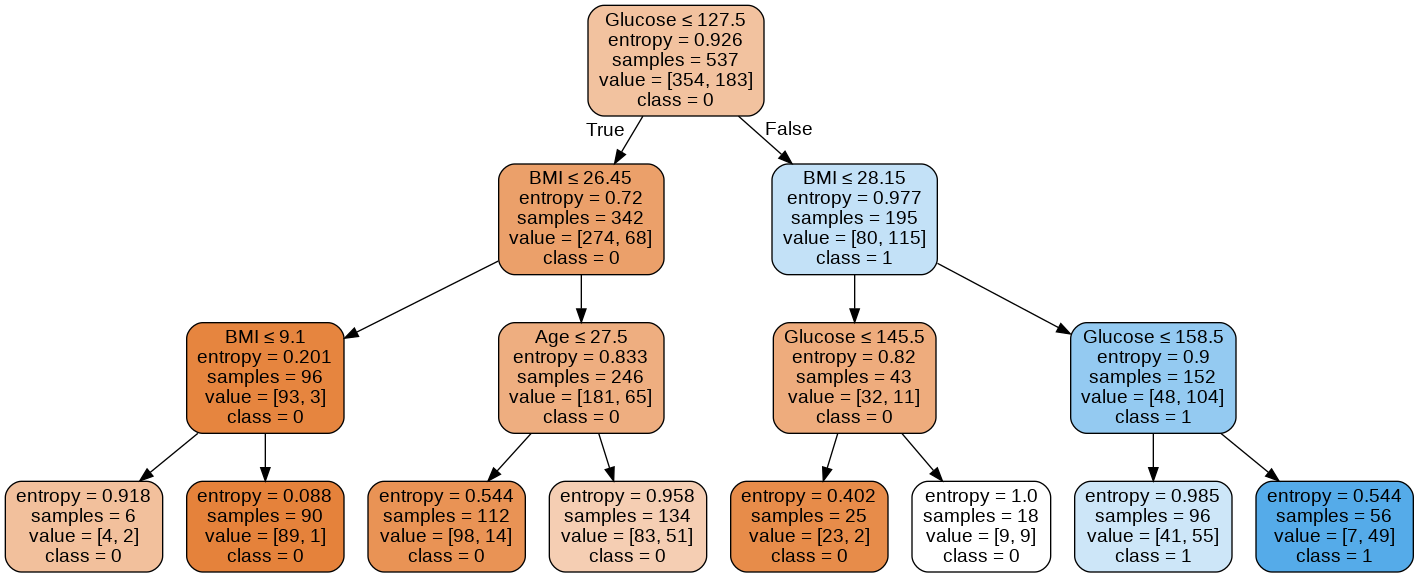

In [8]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Redes neurais

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    print(data)
    
    # make the dataset linearly separable
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    return data
data = load_data()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


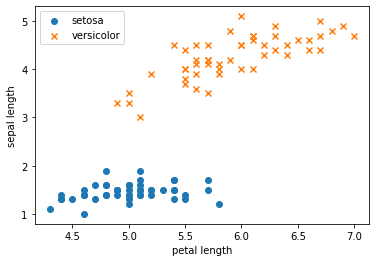

In [10]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [11]:
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(1, features.shape[1]+1))
    
    misclassified_ = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            
            delta = (label.item(0,0) - target)
            
            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)
        
        misclassified_.append(misclassified)
    return (w, misclassified_)
             
num_iter = 10
w, misclassified_ = perceptron(data, num_iter)

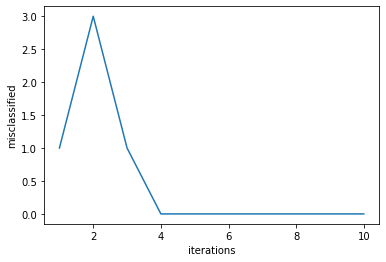

In [12]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

## Máquinas de vetores de suporte (SVM, support vector machine)

Referências

[Scikit-learn: Decision Trees](https://scikit-learn.org/stable/modules/tree.html#)

[Scikit-learn: Train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split)

[Scikit-learn: Accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)